# Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import math
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn import tree
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import statistics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from scipy import stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import average_precision_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

# Step 1.1 Reading data

In [2]:
rank=pd.read_csv('all_risk_df_ordered.csv')

In [3]:
rank=rank.fillna(0)

# Step 1.2 Preprocessing

### Correlations 

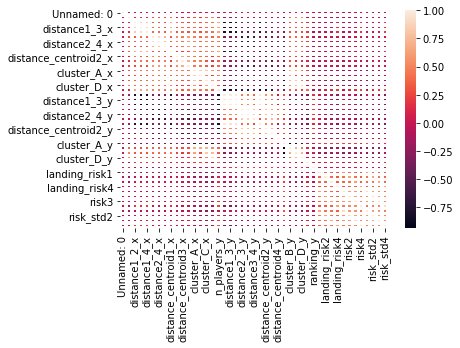

In [4]:
corr_df=rank.corr(method='pearson')
sns.heatmap(corr_df,linewidths=2.5)

In [5]:
corr_df=rank.corr(method='pearson')
corr_df[corr_df>0.6]

,Unnamed: 0,teamId,distance1_2_x,distance1_3_x,distance1_4_x,distance2_3_x,distance2_4_x,distance3_4_x,distance_centroid1_x,distance_centroid2_x,...,landing_risk3,landing_risk4,risk1,risk2,risk3,risk4,risk_std1,risk_std2,risk_std3,risk_std4
Unnamed: 0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
teamId,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance1_2_x,NaN,NaN,1.000000,0.861797,0.844568,NaN,NaN,NaN,0.726792,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance1_3_x,NaN,NaN,0.861797,1.000000,0.913086,NaN,NaN,NaN,0.707325,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance1_4_x,NaN,NaN,0.844568,0.913086,1.000000,NaN,NaN,NaN,0.722543,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance2_3_x,NaN,NaN,NaN,NaN,NaN,1.000000,0.902210,0.705946,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance2_4_x,NaN,NaN,NaN,NaN,NaN,0.902210,1.000000,0.766851,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance3_4_x,NaN,NaN,NaN,NaN,NaN,0.705946,0.766851,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance_centroid1_x,NaN,NaN,0.726792,0.707325,0.722543,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance_centroid2_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
rank[rank.columns[1:]].corr()['ranking_y'][:].sort_values(ascending=False)

ranking_y               1.000000
distance3_4_y           0.220611
distance2_4_y           0.220006
distance2_3_y           0.217298
distance_centroid3_y    0.201093
distance_centroid2_y    0.191315
distance1_4_y           0.172478
distance1_3_y           0.171949
distance1_2_y           0.165651
agility_y               0.142541
distance_centroid1_y    0.137269
teamId                  0.124085
cluster_D_y             0.082802
distance_centroid4_y    0.077704
cluster_C_y             0.052662
risk1                   0.032241
cluster_D_x             0.009142
cluster_B_y             0.001686
risk2                  -0.003789
risk3                  -0.014440
risk_std1              -0.021481
landing_risk1          -0.025700
risk4                  -0.031992
cluster_A_y            -0.032144
distance_centroid1_x   -0.053915
landing_risk2          -0.057643
cluster_C_x            -0.062216
risk_std2              -0.064531
landing_risk3          -0.068740
risk_std3              -0.075037
landing_ri

In [7]:
stats.pearsonr(rank.n_players_y, rank.ranking_y)

(-0.18538657134516412, 0.0)

### Dropping 99

In [8]:
teams_f=rank.replace(99,np.nan).dropna().iloc[:,1:]
teams_exp=teams_f.copy()
teams_exp1=teams_f.copy()

In [9]:
teams_f[teams_f.columns[1:]].corr()['ranking_y'][:].sort_values(ascending=False)

ranking_y               1.000000
agility_y               0.296785
teamId                  0.194063
distance1_2_y           0.182546
distance_centroid2_y    0.180789
cluster_D_y             0.173475
distance1_4_y           0.172881
cluster_C_y             0.167714
distance1_3_y           0.153502
distance_centroid3_y    0.139743
distance_centroid1_y    0.136212
distance3_4_y           0.129793
distance2_4_y           0.124367
cluster_B_y             0.122436
distance_centroid1_x    0.120875
distance2_3_y           0.114823
distance3_4_x           0.107803
cluster_D_x             0.107778
distance_centroid4_x    0.095208
distance2_4_x           0.080956
distance2_3_x           0.069620
cluster_C_x             0.066099
distance_centroid4_y    0.058441
risk2                   0.018364
risk4                   0.017719
risk1                   0.017664
risk3                   0.017439
cluster_A_x             0.003181
distance_centroid3_x   -0.008070
distance1_3_x          -0.015644
distance1_

In [10]:
corr_teams=teams_f.corr(method='pearson')
corr_teams[corr_teams>0.6]

,teamId,distance1_2_x,distance1_3_x,distance1_4_x,distance2_3_x,distance2_4_x,distance3_4_x,distance_centroid1_x,distance_centroid2_x,distance_centroid3_x,...,landing_risk3,landing_risk4,risk1,risk2,risk3,risk4,risk_std1,risk_std2,risk_std3,risk_std4
teamId,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance1_2_x,NaN,1.000000,0.656079,0.607269,NaN,NaN,NaN,NaN,0.954867,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance1_3_x,NaN,0.656079,1.000000,0.737945,NaN,NaN,NaN,NaN,0.623837,0.899644,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance1_4_x,NaN,0.607269,0.737945,1.000000,NaN,NaN,NaN,NaN,NaN,0.705430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance2_3_x,NaN,NaN,NaN,NaN,1.000000,0.867308,0.633628,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance2_4_x,NaN,NaN,NaN,NaN,0.867308,1.000000,0.717462,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance3_4_x,NaN,NaN,NaN,NaN,0.633628,0.717462,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance_centroid1_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance_centroid2_x,NaN,0.954867,0.623837,NaN,NaN,NaN,NaN,NaN,1.000000,0.633234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance_centroid3_x,NaN,NaN,0.899644,0.705430,NaN,NaN,NaN,NaN,0.633234,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
teams_f.loc[:, ['risk_std1','risk_std2','risk_std3','risk_std4']].head(50)

,risk_std1,risk_std2,risk_std3,risk_std4
2,1.830544,4.923881,0.934808,0.582225
3,1.528349,0.768416,0.781638,0.546097
4,1.843158,0.871572,1.252301,0.875221
5,0.294245,0.204124,0.467563,0.658281
9,6.532029,0.868241,1.724891,4.452540
11,7.829015,7.681350,8.556683,8.121124
12,0.976187,0.506370,0.833976,1.092136
13,30.170436,7.605647,18.926988,26.606715
15,1.394538,2.804525,0.397437,1.175735
16,1.737831,1.962787,0.771019,1.442984


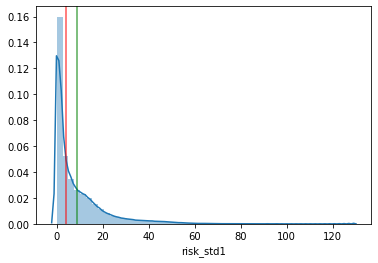

In [12]:
sns.distplot(teams_f.risk_std1)
plt.axvline(x=teams_f.risk_std1.mean(), linewidth=2, color='g', label="mean", alpha=0.5)
plt.axvline(x=teams_f.risk_std1.median(), linewidth=2, color='r', label="median", alpha=0.5)

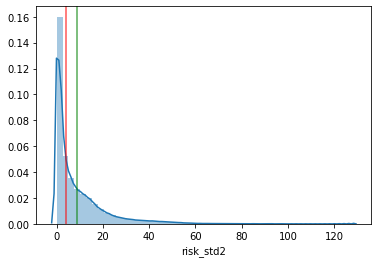

In [13]:
sns.distplot(teams_f.risk_std2)
plt.axvline(x=teams_f.risk_std2.mean(), linewidth=2, color='g', label="mean", alpha=0.5)
plt.axvline(x=teams_f.risk_std2.median(), linewidth=2, color='r', label="median", alpha=0.5)

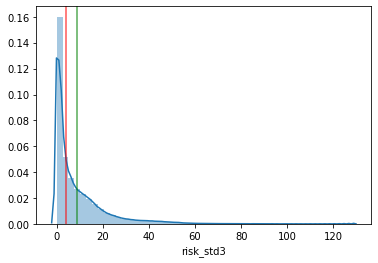

In [14]:
sns.distplot(teams_f.risk_std3)
plt.axvline(x=teams_f.risk_std3.mean(), linewidth=2, color='g', label="mean", alpha=0.5)
plt.axvline(x=teams_f.risk_std3.median(), linewidth=2, color='r', label="median", alpha=0.5)

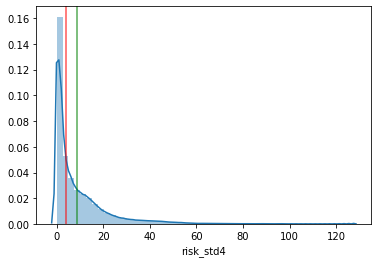

In [15]:
sns.distplot(teams_f.risk_std4)
plt.axvline(x=teams_f.risk_std4.mean(), linewidth=2, color='g', label="mean", alpha=0.5)
plt.axvline(x=teams_f.risk_std4.median(), linewidth=2, color='r', label="median", alpha=0.5)

In [16]:
print(statistics.median(teams_f.risk_std1))
print(statistics.median(teams_f.risk_std2))
print(statistics.median(teams_f.risk_std3))
print(statistics.median(teams_f.risk_std4))

4.136924834809812
4.151977391094229
4.154707656124242
4.131454741442259


In [17]:
teams_f[(teams_f.risk_std4>4.2) & (teams_f.risk_std3>4.2) & (teams_f.risk_std2>4.2) & (teams_f.risk_std1>4.2)]

,matchId,teamId,distance1_2_x,distance1_3_x,distance1_4_x,distance2_3_x,distance2_4_x,distance3_4_x,distance_centroid1_x,distance_centroid2_x,...,landing_risk3,landing_risk4,risk1,risk2,risk3,risk4,risk_std1,risk_std2,risk_std3,risk_std4
11,000fe633-8af8-4037-b318-a1ca39ded6df,12,0.852513,0.847308,0.931487,0.884528,0.925231,1.237677,0.864427,0.851408,...,7.0000,0.0000,3.820000,6.725490,6.634615,4.920000,7.829015,7.681350,8.556683,8.121124
13,000fe633-8af8-4037-b318-a1ca39ded6df,14,0.724755,0.712166,0.743205,0.435130,0.508403,1.111562,1.248316,0.568091,...,34.0000,111.0000,22.754098,4.105263,22.898305,25.894737,30.170436,7.605647,18.926988,26.606715
17,000fe633-8af8-4037-b318-a1ca39ded6df,18,1.182066,1.168581,1.193459,0.995557,1.123615,1.122039,1.326003,1.146690,...,33.0000,73.0000,27.615385,42.307692,59.564103,25.421053,37.177820,48.997397,50.611417,45.625758
18,000fe633-8af8-4037-b318-a1ca39ded6df,19,0.668594,0.664855,0.674631,0.997339,0.778803,1.263172,1.266653,0.740789,...,34.0000,30.0000,7.666667,8.000000,4.272727,2.550000,13.161994,11.011955,10.139930,7.500702
19,000fe633-8af8-4037-b318-a1ca39ded6df,20,0.903415,0.620221,0.628432,0.599281,0.557480,0.653294,0.947466,0.865418,...,11.0000,67.0000,22.181818,16.349206,25.295082,11.863636,24.219451,21.858164,23.553021,17.065382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423899,82f29ae2-ac68-4462-9bb7-19827978b75b,12,0.835417,0.770539,0.845679,0.823758,0.939370,1.315083,1.138581,0.855869,...,54.6875,32.8125,43.315972,35.526316,27.187500,33.223684,31.755134,29.016738,23.211077,23.465505
423901,82f29ae2-ac68-4462-9bb7-19827978b75b,14,0.765915,0.712371,0.802892,0.781772,0.824517,1.140413,0.806145,0.730726,...,10.9375,73.4375,16.206395,3.607048,5.116758,27.906586,28.454006,5.123776,12.584493,48.903999
423905,82f29ae2-ac68-4462-9bb7-19827978b75b,18,0.716378,0.704900,0.806139,0.520141,0.654089,0.837365,1.052727,0.709960,...,10.9375,45.3125,32.457386,11.409198,12.293632,15.596591,27.349306,12.167239,15.869593,17.358917
423919,83008edd-719f-4971-ae4b-457ee97381e2,1,0.926510,0.999918,1.345519,0.785216,0.773674,0.999978,1.540838,0.926012,...,1.5625,3.1250,10.723039,12.280702,14.185049,10.890152,12.831615,12.347135,17.320066,12.636491


In [18]:
print(statistics.stdev(teams_f.risk_std1))
print(statistics.stdev(teams_f.risk_std2))
print(statistics.stdev(teams_f.risk_std3))
print(statistics.stdev(teams_f.risk_std4))

12.165627851109505
12.203403501091406
12.149474942580557
12.224289709715121


In [19]:
print(statistics.mean(teams_f.risk_std1))
print(statistics.mean(teams_f.risk_std2))
print(statistics.mean(teams_f.risk_std3))
print(statistics.mean(teams_f.risk_std4))

8.918298604307891
8.937947384094292
8.917510660835697
8.927349345060653


In [20]:
#Median to Mean
teams_f[(teams_f.risk_std4>4.2) & (teams_f.risk_std3>4.2) & (teams_f.risk_std2>4.2) & (teams_f.risk_std1>4.2) & (teams_f.risk_std4<8.94) & (teams_f.risk_std3<8.94) & (teams_f.risk_std2<8.94) & (teams_f.risk_std1<8.94)]

,matchId,teamId,distance1_2_x,distance1_3_x,distance1_4_x,distance2_3_x,distance2_4_x,distance3_4_x,distance_centroid1_x,distance_centroid2_x,...,landing_risk3,landing_risk4,risk1,risk2,risk3,risk4,risk_std1,risk_std2,risk_std3,risk_std4
11,000fe633-8af8-4037-b318-a1ca39ded6df,12,0.852513,0.847308,0.931487,0.884528,0.925231,1.237677,0.864427,0.851408,...,7.0,0.0,3.820000,6.725490,6.634615,4.920000,7.829015,7.681350,8.556683,8.121124
108,001fba5b-c159-4fb8-bbb0-044310e780ff,2,0.735452,0.759605,0.809799,0.846757,0.886455,1.009373,2.149633,0.684859,...,5.0,13.0,6.111111,5.507937,5.507937,7.587302,7.429963,6.420414,6.657213,7.946667
113,001fba5b-c159-4fb8-bbb0-044310e780ff,7,1.266416,1.136302,1.741836,0.791397,0.387908,1.072068,1.298271,1.230632,...,23.0,15.0,6.735849,3.800000,3.480000,3.145631,7.554629,4.772369,5.605697,4.424548
121,001fba5b-c159-4fb8-bbb0-044310e780ff,15,1.309681,1.356795,1.458271,0.931595,0.890853,1.024650,1.367028,1.198029,...,12.0,1.0,3.994382,3.022727,4.050000,3.731429,6.802706,6.377599,7.335743,6.270886
122,001fba5b-c159-4fb8-bbb0-044310e780ff,16,0.846886,0.885801,0.904089,0.934563,0.956488,1.077845,0.938540,0.812856,...,46.0,46.0,3.130435,1.774775,2.394737,2.442478,8.360855,5.978271,7.587389,6.837316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423409,8293b42e-0bb2-4811-aaa1-f18d2de458e3,15,0.613134,0.641346,0.588639,0.594896,0.686248,1.071386,0.954080,0.583442,...,7.0,4.0,5.456522,5.442308,4.000000,4.869565,6.441899,5.123623,4.233902,4.978213
423417,8293b42e-0bb2-4811-aaa1-f18d2de458e3,23,0.679026,0.677853,0.715067,0.742833,0.757551,0.952739,0.673965,0.707789,...,19.0,3.0,6.828571,7.162162,7.823529,5.684211,6.200027,6.942276,7.937142,5.959799
423556,82ae10b8-aa28-4e85-808b-45f6a410ad8b,22,1.041369,1.055177,1.411117,0.946797,0.998726,1.281144,1.129804,1.023416,...,1.0,7.0,4.810345,5.793651,7.111111,5.150000,6.256104,6.276322,8.322044,5.501387
423700,82dc0c50-c9fd-4c95-aeee-9356e64af5d1,9,1.456221,1.492317,1.635097,1.530865,1.521141,1.529682,1.474879,1.447666,...,4.0,9.0,4.902439,6.962963,5.784314,5.250000,5.360993,7.216237,5.449087,5.491080


In [21]:
#Median to Median+1 st.dev
teams_f[(teams_f.risk_std4>4.2) & (teams_f.risk_std3>4.2) & (teams_f.risk_std2>4.2) & (teams_f.risk_std1>4.2) & (teams_f.risk_std4<16.4) & (teams_f.risk_std3<16.4) & (teams_f.risk_std2<16.4) & (teams_f.risk_std1<16.4)]

,matchId,teamId,distance1_2_x,distance1_3_x,distance1_4_x,distance2_3_x,distance2_4_x,distance3_4_x,distance_centroid1_x,distance_centroid2_x,...,landing_risk3,landing_risk4,risk1,risk2,risk3,risk4,risk_std1,risk_std2,risk_std3,risk_std4
11,000fe633-8af8-4037-b318-a1ca39ded6df,12,0.852513,0.847308,0.931487,0.884528,0.925231,1.237677,0.864427,0.851408,...,7.0000,0.000,3.820000,6.725490,6.634615,4.920000,7.829015,7.681350,8.556683,8.121124
18,000fe633-8af8-4037-b318-a1ca39ded6df,19,0.668594,0.664855,0.674631,0.997339,0.778803,1.263172,1.266653,0.740789,...,34.0000,30.000,7.666667,8.000000,4.272727,2.550000,13.161994,11.011955,10.139930,7.500702
21,000fe633-8af8-4037-b318-a1ca39ded6df,22,1.064306,0.951711,1.308280,0.526043,0.560377,1.029807,1.109784,1.057092,...,1.0000,19.000,2.094340,4.213542,1.844920,13.777778,5.667800,8.822343,5.022799,10.567723
84,00192396-e3b7-4951-a841-3b5bb1be6556,31,1.193869,1.151939,1.151850,1.500409,1.364182,1.287776,1.192402,1.243004,...,84.0000,84.000,4.417266,5.817518,5.467626,5.824818,8.426063,12.174116,11.510110,10.676319
94,001d5f8a-6e48-419e-a07e-b60a24323f5d,6,0.750143,0.865287,1.344517,0.844967,0.930616,1.123428,1.171434,0.713139,...,23.4375,3.125,7.040663,8.602941,8.525815,6.818182,12.106451,10.965694,9.384871,8.358081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423869,82eb095c-a534-4328-88c4-e07f38ce85bf,4,0.670110,0.695979,0.725186,0.725318,0.714369,1.082443,0.881850,0.624577,...,1.0000,4.000,2.881481,3.112782,3.244275,4.538462,5.121001,5.415542,4.672492,6.645105
423874,82eb095c-a534-4328-88c4-e07f38ce85bf,10,1.071316,1.061286,1.697454,0.937342,0.925593,1.420328,1.349907,1.113534,...,14.0000,11.000,6.500000,4.230769,11.000000,13.615385,5.652200,7.037446,14.268847,13.053766
423878,82eb095c-a534-4328-88c4-e07f38ce85bf,14,0.641062,0.665681,0.949722,0.823331,0.743305,1.236485,1.614530,0.679125,...,22.0000,84.000,5.213675,4.554622,5.318841,7.277778,13.285868,11.528665,11.306600,14.269766
423882,82eb095c-a534-4328-88c4-e07f38ce85bf,19,0.872705,0.625376,0.661911,0.798903,0.812545,1.022587,1.266383,0.820772,...,15.0000,9.000,3.785714,4.300000,5.266234,3.915033,7.806261,8.160835,11.306798,6.959420


In [22]:
#Median to Median+1 st.dev
teams_f[(teams_f.risk_std4>4.2) & (teams_f.risk_std3>4.2) & (teams_f.risk_std2>4.2) & (teams_f.risk_std1>4.2) & (teams_f.risk_std4<28.6) & (teams_f.risk_std3<28.6) & (teams_f.risk_std2<28.6) & (teams_f.risk_std1<28.6)]

,matchId,teamId,distance1_2_x,distance1_3_x,distance1_4_x,distance2_3_x,distance2_4_x,distance3_4_x,distance_centroid1_x,distance_centroid2_x,...,landing_risk3,landing_risk4,risk1,risk2,risk3,risk4,risk_std1,risk_std2,risk_std3,risk_std4
11,000fe633-8af8-4037-b318-a1ca39ded6df,12,0.852513,0.847308,0.931487,0.884528,0.925231,1.237677,0.864427,0.851408,...,7.0000,0.0000,3.820000,6.725490,6.634615,4.920000,7.829015,7.681350,8.556683,8.121124
18,000fe633-8af8-4037-b318-a1ca39ded6df,19,0.668594,0.664855,0.674631,0.997339,0.778803,1.263172,1.266653,0.740789,...,34.0000,30.0000,7.666667,8.000000,4.272727,2.550000,13.161994,11.011955,10.139930,7.500702
19,000fe633-8af8-4037-b318-a1ca39ded6df,20,0.903415,0.620221,0.628432,0.599281,0.557480,0.653294,0.947466,0.865418,...,11.0000,67.0000,22.181818,16.349206,25.295082,11.863636,24.219451,21.858164,23.553021,17.065382
21,000fe633-8af8-4037-b318-a1ca39ded6df,22,1.064306,0.951711,1.308280,0.526043,0.560377,1.029807,1.109784,1.057092,...,1.0000,19.0000,2.094340,4.213542,1.844920,13.777778,5.667800,8.822343,5.022799,10.567723
63,00192396-e3b7-4951-a841-3b5bb1be6556,10,1.199728,0.924086,1.075512,1.327018,1.282485,1.324109,1.250157,1.220151,...,8.0000,9.0000,22.114286,12.333333,8.750000,17.600000,26.020096,21.450353,17.225669,22.835988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423895,82f29ae2-ac68-4462-9bb7-19827978b75b,7,0.750317,0.756759,0.834397,1.045402,1.069412,1.402875,1.274814,0.818652,...,0.0000,39.0625,11.940586,8.904367,12.460938,10.119913,14.128121,23.650877,14.096467,12.388581
423896,82f29ae2-ac68-4462-9bb7-19827978b75b,8,0.459832,0.450054,0.802471,0.421576,0.756987,0.779598,0.508293,0.427547,...,20.3125,29.6875,11.221591,12.343750,10.639881,11.277174,19.237441,17.792868,14.654376,16.038260
423897,82f29ae2-ac68-4462-9bb7-19827978b75b,10,0.665058,0.715837,0.649160,0.863582,0.734059,1.046267,1.426942,0.675973,...,9.3750,37.5000,10.388514,16.845703,12.872024,8.506944,19.425813,18.233539,15.967323,12.767476
423905,82f29ae2-ac68-4462-9bb7-19827978b75b,18,0.716378,0.704900,0.806139,0.520141,0.654089,0.837365,1.052727,0.709960,...,10.9375,45.3125,32.457386,11.409198,12.293632,15.596591,27.349306,12.167239,15.869593,17.358917


In [23]:
#Pure Exploitators
teams_f[(teams_f.risk_std4>28.6) & (teams_f.risk_std3>28.6) & (teams_f.risk_std2>28.6) & (teams_f.risk_std1>28.6)]

,matchId,teamId,distance1_2_x,distance1_3_x,distance1_4_x,distance2_3_x,distance2_4_x,distance3_4_x,distance_centroid1_x,distance_centroid2_x,...,landing_risk3,landing_risk4,risk1,risk2,risk3,risk4,risk_std1,risk_std2,risk_std3,risk_std4
17,000fe633-8af8-4037-b318-a1ca39ded6df,18,1.182066,1.168581,1.193459,0.995557,1.123615,1.122039,1.326003,1.146690,...,33.0000,73.0000,27.615385,42.307692,59.564103,25.421053,37.177820,48.997397,50.611417,45.625758
76,00192396-e3b7-4951-a841-3b5bb1be6556,23,0.972374,0.931791,0.991352,0.706812,0.908184,1.403678,1.120626,0.865117,...,120.0000,114.0000,66.868217,12.357143,12.333333,37.285714,51.919014,29.026797,30.679604,45.875129
477,009c150b-7f1d-4301-9ed0-006c801ee6d3,4,0.760655,0.755490,0.799100,0.999575,1.062133,1.308958,0.926635,0.838132,...,116.0000,34.0000,26.407407,44.615385,43.333333,26.958333,33.310035,36.987649,40.263555,31.401300
633,00b80e05-f983-4077-a6e2-ab1409e7eb37,13,1.039656,1.113152,1.599674,1.056790,1.041470,1.077259,1.141089,0.980371,...,33.0000,23.0000,21.285714,20.948718,20.798165,18.862385,35.522212,34.563404,35.084232,33.003218
663,00ba39f3-829f-46be-8b3d-b86a474ecf2e,15,0.961330,0.952582,0.946663,0.954856,0.935445,1.011731,1.020117,0.980245,...,48.4375,246.8750,80.983232,80.248397,86.578526,74.123476,91.642258,86.769661,85.015023,78.174241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423405,8293b42e-0bb2-4811-aaa1-f18d2de458e3,11,1.013918,0.891474,0.914488,0.661584,1.006473,1.422419,1.611045,0.966379,...,67.0000,140.0000,21.066667,31.428571,53.764706,48.958333,37.961384,51.568795,53.407080,49.563731
423592,82b507b4-af4e-4044-991b-2af0a5e49b7b,5,0.903596,0.955501,1.304129,0.629978,0.527022,0.711691,0.949559,0.812177,...,3.1250,4.6875,21.791295,25.540865,24.308894,61.413043,34.092876,32.112611,41.385479,61.999836
423870,82eb095c-a534-4328-88c4-e07f38ce85bf,5,0.774115,0.737242,1.021788,0.793792,0.783034,1.085708,0.933194,0.786407,...,45.0000,108.0000,47.259259,41.375000,31.022727,31.372549,50.665825,47.942603,40.328586,38.020500
423872,82eb095c-a534-4328-88c4-e07f38ce85bf,7,1.254219,1.288099,1.271199,1.058772,1.109143,1.106354,1.304774,1.157553,...,2.0000,1.0000,23.008772,19.415929,18.763158,19.482759,34.773476,31.650921,29.995959,33.628270


In [24]:
col = teams_f.loc[: , "risk_std1":"risk_std4"]
teams_f['risk_std_mean'] = col.mean(axis=1)

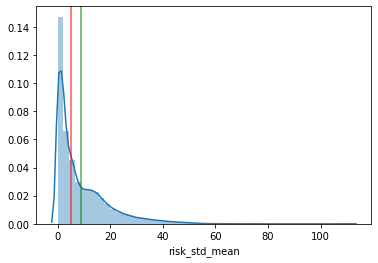

In [25]:
sns.distplot(teams_f.risk_std_mean)
plt.axvline(x=teams_f.risk_std_mean.mean(), linewidth=2, color='g', label="mean", alpha=0.5)
plt.axvline(x=teams_f.risk_std_mean.median(), linewidth=2, color='r', label="median", alpha=0.5)

In [26]:
print(statistics.mean(teams_f.risk_std_mean))
print(statistics.median(teams_f.risk_std_mean))
print(statistics.stdev(teams_f.risk_std_mean))

8.925276498574632
4.962790991878398
10.441179006490055


In [27]:
statistics.median(teams_f.risk_std_mean)+statistics.stdev(teams_f.risk_std_mean)

15.403969998368453

In [28]:
#Bigger than Median+st.dev (EXPLOITORS)
teams_f[teams_f.risk_std_mean>statistics.median(teams_f.risk_std_mean)+statistics.stdev(teams_f.risk_std_mean)]

,matchId,teamId,distance1_2_x,distance1_3_x,distance1_4_x,distance2_3_x,distance2_4_x,distance3_4_x,distance_centroid1_x,distance_centroid2_x,...,landing_risk4,risk1,risk2,risk3,risk4,risk_std1,risk_std2,risk_std3,risk_std4,risk_std_mean
13,000fe633-8af8-4037-b318-a1ca39ded6df,14,0.724755,0.712166,0.743205,0.435130,0.508403,1.111562,1.248316,0.568091,...,111.0000,22.754098,4.105263,22.898305,25.894737,30.170436,7.605647,18.926988,26.606715,20.827446
17,000fe633-8af8-4037-b318-a1ca39ded6df,18,1.182066,1.168581,1.193459,0.995557,1.123615,1.122039,1.326003,1.146690,...,73.0000,27.615385,42.307692,59.564103,25.421053,37.177820,48.997397,50.611417,45.625758,45.603098
19,000fe633-8af8-4037-b318-a1ca39ded6df,20,0.903415,0.620221,0.628432,0.599281,0.557480,0.653294,0.947466,0.865418,...,67.0000,22.181818,16.349206,25.295082,11.863636,24.219451,21.858164,23.553021,17.065382,21.674005
32,001537df-8dc4-49fe-bff3-0871684e93df,6,1.750639,0.989701,1.625060,1.194732,1.069557,0.775672,2.102248,1.708012,...,21.0000,31.318182,5.960000,21.066667,7.285714,31.300976,8.946508,19.842367,8.815571,17.226355
46,001537df-8dc4-49fe-bff3-0871684e93df,20,0.904987,0.919835,1.497324,0.604167,0.630684,0.870551,1.767138,0.881303,...,14.0000,14.018868,9.263889,26.452830,28.531250,18.309824,13.942531,26.889064,28.652517,21.948484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423898,82f29ae2-ac68-4462-9bb7-19827978b75b,11,0.692523,0.767451,0.788386,0.806490,0.692482,0.866737,0.893177,0.668967,...,31.2500,18.833705,17.425847,14.814815,24.643640,21.406135,31.267255,19.642058,22.809705,23.781288
423899,82f29ae2-ac68-4462-9bb7-19827978b75b,12,0.835417,0.770539,0.845679,0.823758,0.939370,1.315083,1.138581,0.855869,...,32.8125,43.315972,35.526316,27.187500,33.223684,31.755134,29.016738,23.211077,23.465505,26.862113
423901,82f29ae2-ac68-4462-9bb7-19827978b75b,14,0.765915,0.712371,0.802892,0.781772,0.824517,1.140413,0.806145,0.730726,...,73.4375,16.206395,3.607048,5.116758,27.906586,28.454006,5.123776,12.584493,48.903999,23.766568
423905,82f29ae2-ac68-4462-9bb7-19827978b75b,18,0.716378,0.704900,0.806139,0.520141,0.654089,0.837365,1.052727,0.709960,...,45.3125,32.457386,11.409198,12.293632,15.596591,27.349306,12.167239,15.869593,17.358917,18.186264


In [29]:
#Between Mean and Mean+1st.Dev (Ambidexters)
teams_f[(teams_f.risk_std_mean<statistics.median(teams_f.risk_std_mean)+statistics.stdev(teams_f.risk_std_mean)) & (teams_f.risk_std_mean>statistics.median(teams_f.risk_std_mean))]

,matchId,teamId,distance1_2_x,distance1_3_x,distance1_4_x,distance2_3_x,distance2_4_x,distance3_4_x,distance_centroid1_x,distance_centroid2_x,...,landing_risk4,risk1,risk2,risk3,risk4,risk_std1,risk_std2,risk_std3,risk_std4,risk_std_mean
11,000fe633-8af8-4037-b318-a1ca39ded6df,12,0.852513,0.847308,0.931487,0.884528,0.925231,1.237677,0.864427,0.851408,...,0.000,3.820000,6.725490,6.634615,4.920000,7.829015,7.681350,8.556683,8.121124,8.047043
18,000fe633-8af8-4037-b318-a1ca39ded6df,19,0.668594,0.664855,0.674631,0.997339,0.778803,1.263172,1.266653,0.740789,...,30.000,7.666667,8.000000,4.272727,2.550000,13.161994,11.011955,10.139930,7.500702,10.453645
21,000fe633-8af8-4037-b318-a1ca39ded6df,22,1.064306,0.951711,1.308280,0.526043,0.560377,1.029807,1.109784,1.057092,...,19.000,2.094340,4.213542,1.844920,13.777778,5.667800,8.822343,5.022799,10.567723,7.520166
30,001537df-8dc4-49fe-bff3-0871684e93df,4,0.607946,0.619051,0.647313,0.462598,0.536896,0.939561,1.047887,0.561246,...,43.000,12.794872,4.264706,7.289474,21.111111,12.473508,3.126706,10.459466,19.300300,11.339995
34,001537df-8dc4-49fe-bff3-0871684e93df,8,1.494980,1.344899,1.270325,0.157478,0.186313,1.146479,1.561074,1.405457,...,31.000,10.653595,0.000000,11.351562,14.398693,14.009076,0.000000,17.229159,19.677779,12.729004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423909,82f4ecf6-6a67-43ce-9360-7a13c579bc6b,202,0.905314,1.124635,1.148296,1.507592,1.534099,1.888570,2.349492,0.919167,...,0.000,2.738095,0.405405,22.857143,3.122137,2.613842,1.073468,42.226204,5.891353,12.951217
423919,83008edd-719f-4971-ae4b-457ee97381e2,1,0.926510,0.999918,1.345519,0.785216,0.773674,0.999978,1.540838,0.926012,...,3.125,10.723039,12.280702,14.185049,10.890152,12.831615,12.347135,17.320066,12.636491,13.783827
423922,83008edd-719f-4971-ae4b-457ee97381e2,200,0.968537,1.343057,1.402416,1.666341,1.695609,1.599047,1.218012,0.986054,...,0.000,0.246711,2.942708,7.421875,4.815574,0.783531,6.257223,8.267973,8.526227,5.958738
423929,83072954-fa84-48af-a1a9-cf254e9254d5,201,1.399010,0.757237,0.792726,0.939029,0.906459,1.413148,1.405623,1.403660,...,0.000,3.479452,12.942149,0.116883,4.545455,4.503423,21.545803,0.561343,10.508727,9.279824


## Building Ambidexterity

In [30]:
col         = 'risk_std_mean'
conditions  = [ teams_f[col] > statistics.median(teams_f[col])+statistics.stdev(teams_f[col]), (teams_f[col]<statistics.median(teams_f[col])+statistics.stdev(teams_f[col])) & (teams_f[col]>statistics.median(teams_f[col])), teams_f[col] <= statistics.median(teams_f[col]) ]
# choices     = [ "Exploit", 'Ambidexter', 'Explore' ]
choices     = [ "1", '2', '3' ]
teams_f["risk_category"] = np.select(conditions, choices, default=np.nan)

In [31]:
teams_f["risk_category"].value_counts()

3    138943
2     82128
1     56814
Name: risk_category, dtype: int64

### Scaling

teams_exp=teams_f.copy()
teams_exp1=teams_f.copy()

In [32]:
# teams_exp_sc0_1=teams_exp.copy()
# teams_exp_sc1_1=teams_exp.copy()
# teams_f_sc0_1=teams_f.copy()
# teams_f_sc1_1=teams_f.copy()

In [33]:
teams_exp1['in Top 5']=np.where(teams_exp1['ranking_y']<=5, 1,0)

In [34]:
X_old=teams_exp1.drop(["ranking_y",'in Top 5'],axis=1)
y_old=teams_exp1['in Top 5']
X_old=X_old.iloc[:,2:]

In [35]:
scaler1=MinMaxScaler(feature_range=(0,1))
X_sc0_1=scaler1.fit_transform(X_old)

In [36]:
scaler2 = StandardScaler()
X_sc_st=scaler2.fit_transform(X_old)

In [37]:
transformer = RobustScaler().fit(X_old)
X_sc_r=transformer.transform(X_old)

### For new X with categories

In [38]:
teams_f['in Top 5']=np.where(teams_f['ranking_y']<=5, 1,0)

In [39]:
X_new=teams_f.drop(["ranking_y",'in Top 5','matchId'],axis=1)
y_new=teams_f['in Top 5']
X_new=X_new.loc[:, X_new.columns != 'risk_category']

In [40]:
scaler3=MinMaxScaler(feature_range=(0,1))
X_new_sc0_1=scaler1.fit_transform(X_new)

cat_array=teams_f[['risk_category']].to_numpy()
sc0_1_array = np.append(X_new_sc0_1,cat_array, axis=1)

In [41]:
scaler4 = StandardScaler()
X_new_sc_st=scaler2.fit_transform(X_new)
sc_st_array=np.append(X_new_sc_st,cat_array, axis=1)

In [42]:
transformer2 = RobustScaler().fit(X_new)
X_new_sc_r=transformer2.transform(X_new)
sc_r_array=np.append(X_new_sc_r,cat_array, axis=1)

# Step 1.3 Upsampling

#### Upsamling Synthetic

#### Upsampling by replication

# Step 2 Model Building

In [43]:
res_w1=pd.DataFrame()
res_w2=pd.DataFrame()
res_w3=pd.DataFrame()
resall=pd.DataFrame()

In [68]:
# Logistic Regression

#Train-Test set 0-1 Scaling
test_size=0.2
seed=7

X_train, X_test, y_train, y_test = train_test_split(X_sc0_1, y_old, test_size=test_size, random_state=seed)

kfold=KFold(n_splits=10, random_state=7)

model=LogisticRegression(solver="liblinear",class_weight="balanced")

results=cross_val_score(model, X_train, y_train, cv=kfold)

print(f'Logistic Regression 0-1 - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

results_t=cross_val_score(model, X_test, y_test, cv=kfold)

print(f'Logistic Regression 0-1 - Accuracy {results_t.mean()*100:.3f}% std {results_t.std()*100:3f}')


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Logistic Regression 0-1 - Accuracy 69.994% std 0.176262
Logistic Regression 0-1 - Accuracy 69.707% std 0.582929


In [65]:
#Train-Test set Standard Scaling

X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(X_sc_st, y_old, test_size=test_size, random_state=seed)
results_st=cross_val_score(model, X_train_st, y_train_st, cv=kfold)

print(f'Logistic Regression Std.Scaling - Accuracy {results_st.mean()*100:.3f}% std {results_st.std()*100:3f}')

results_st_t=cross_val_score(model, X_test_st, y_test_st, cv=kfold)

print(f'Logistic Regression Std.Scaling - Accuracy {results_st_t.mean()*100:.3f}% std {results_st_t.std()*100:3f}')


Logistic Regression Std.Scaling - Accuracy 70.035% std 0.169116
Logistic Regression Std.Scaling - Accuracy 69.849% std 0.626706


In [67]:
#Train-Test set Robust Scaling

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_sc_r, y_old, test_size=test_size, random_state=seed)
results_r=cross_val_score(model, X_train_r, y_train_r, cv=kfold)

print(f'Logistic Regression Robust Scaling - Accuracy {results_r.mean()*100:.3f}% std {results_r.std()*100:3f}')

results_r_t=cross_val_score(model, X_test_r, y_test_r, cv=kfold)

print(f'Logistic Regression Robust Scaling - Accuracy {results_r_t.mean()*100:.3f}% std {results_r_t.std()*100:3f}')


Logistic Regression Robust Scaling - Accuracy 70.037% std 0.168169
Logistic Regression Robust Scaling - Accuracy 69.854% std 0.622113


In [73]:
# TRAIN METRICS
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.69      0.78    168497
           1       0.43      0.74      0.55     53811

    accuracy                           0.70    222308
   macro avg       0.66      0.72      0.66    222308
weighted avg       0.78      0.70      0.72    222308



In [74]:
# TEST METRICS
model.fit(X_test, y_test)
y_pred_t = model.predict(X_test)
print(classification_report(y_test, y_pred_t))

              precision    recall  f1-score   support

           0       0.90      0.68      0.77     42237
           1       0.43      0.75      0.54     13340

    accuracy                           0.70     55577
   macro avg       0.66      0.71      0.66     55577
weighted avg       0.78      0.70      0.72     55577



In [75]:
# TRAIN METRICS
model.fit(X_train_st, y_train_st)
y_pred_st = model.predict(X_train_st)
print(classification_report(y_train_st, y_pred_st))

              precision    recall  f1-score   support

           0       0.89      0.69      0.78    168497
           1       0.43      0.75      0.55     53811

    accuracy                           0.70    222308
   macro avg       0.66      0.72      0.66    222308
weighted avg       0.78      0.70      0.72    222308



In [77]:
# TRAIN METRICS
model.fit(X_train_r, y_train_r)
y_pred_r = model.predict(X_train_r)
print(classification_report(y_train_r, y_pred_r))

              precision    recall  f1-score   support

           0       0.89      0.69      0.78    168497
           1       0.43      0.75      0.55     53811

    accuracy                           0.70    222308
   macro avg       0.66      0.72      0.66    222308
weighted avg       0.78      0.70      0.72    222308



In [78]:
# TEST METRICS
model.fit(X_test_r, y_test_r)
y_pred_r_t = model.predict(X_test_r)
print(classification_report(y_test_r, y_pred_r_t))

              precision    recall  f1-score   support

           0       0.90      0.68      0.78     42237
           1       0.43      0.75      0.54     13340

    accuracy                           0.70     55577
   macro avg       0.66      0.72      0.66     55577
weighted avg       0.78      0.70      0.72     55577



In [ ]:
res_w1["Res"]=results
res_w1["Type"]="log sc.0-1"

res_w2["Res"]=results_scl
res_w2["Type"]="log st.sc"

res_w3["Res"]=results_sc2
res_w3["Type"]="log robust.sc"

resall=pd.concat([resall,res_w1,res_w2,res_w3], ignore_index=True)

# New models

In [98]:
results2=cross_val_score(model, sc0_1_array, y_new, cv=kfold)

print(f'Logistic Regression New 0-1 - Accuracy {results2.mean()*100:.3f}% std {results2.std()*100:3f}')

results_sc3=cross_val_score(model, sc_st_array, y_new, cv=kfold)

print(f'Logistic Regression New Std.Scaling - Accuracy {results_sc3.mean()*100:.3f}% std {results_sc3.std()*100:3f}')

results_sc4=cross_val_score(model, sc_r_array, y_new, cv=kfold)

print(f'Logistic Regression New Robust Scaling - Accuracy {results_sc4.mean()*100:.3f}% std {results_sc4.std()*100:3f}')

Logistic Regression New 0-1 - Accuracy 69.774% std 1.961364
Logistic Regression New Std.Scaling - Accuracy 69.814% std 1.944337
Logistic Regression New Robust Scaling - Accuracy 69.812% std 1.943634


In [85]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(sc0_1_array, y_new, test_size=test_size, random_state=seed)
results_new=cross_val_score(model, X_train_new_r, y_train_new_r, cv=kfold)

print(f'New Logistic Regression 0-1 Scaling - Accuracy {results_new.mean()*100:.3f}% std {results_new.std()*100:3f}')

results_new_t=cross_val_score(model, X_test_new, y_test_new, cv=kfold)

print(f'New Logistic Regression 0-1 Scaling - Accuracy {results_new_t.mean()*100:.3f}% std {results_new_t.std()*100:3f}')

New Logistic Regression 0-1 Scaling - Accuracy 69.858% std 0.212119
New Logistic Regression 0-1 Scaling - Accuracy 69.628% std 0.560529


In [86]:
# TRAIN METRICS
model.fit(X_train_new, y_train_new)
y_pred_new = model.predict(X_train_new)
print(classification_report(y_train_new, y_pred_new))

              precision    recall  f1-score   support

           0       0.90      0.68      0.77    168497
           1       0.43      0.75      0.55     53811

    accuracy                           0.70    222308
   macro avg       0.66      0.72      0.66    222308
weighted avg       0.78      0.70      0.72    222308



In [87]:
# TEST METRICS
model.fit(X_test_new, y_test_new)
y_pred_new_t = model.predict(X_test_new)
print(classification_report(y_test_new, y_pred_new_t))

              precision    recall  f1-score   support

           0       0.90      0.68      0.77     42237
           1       0.43      0.76      0.54     13340

    accuracy                           0.70     55577
   macro avg       0.66      0.72      0.66     55577
weighted avg       0.78      0.70      0.72     55577



In [89]:
X_train_new_st, X_test_new_st, y_train_new_st, y_test_new_st = train_test_split(sc_st_array, y_new, test_size=test_size, random_state=seed)
results_new_st=cross_val_score(model, X_train_new_st, y_train_new_st, cv=kfold)

print(f'New Logistic Regression  St.Scaling - Accuracy {results_new_st.mean()*100:.3f}% std {results_new_st.std()*100:3f}')

results_new_st_t=cross_val_score(model, X_test_new_st, y_test_new_st, cv=kfold)

print(f'New Logistic Regression St.Scaling - Accuracy {results_new_st_t.mean()*100:.3f}% std {results_new_st_t.std()*100:3f}')

New Logistic Regression  St.Scaling - Accuracy 69.855% std 0.209680
New Logistic Regression St.Scaling - Accuracy 69.675% std 0.542469


In [90]:
# TRAIN METRICS
model.fit(X_train_new_st, y_train_new_st)
y_pred_new_st = model.predict(X_train_new_st)
print(classification_report(y_train_new_st, y_pred_new_st))

              precision    recall  f1-score   support

           0       0.90      0.68      0.77    168497
           1       0.43      0.75      0.55     53811

    accuracy                           0.70    222308
   macro avg       0.66      0.72      0.66    222308
weighted avg       0.78      0.70      0.72    222308



In [91]:
# TEST METRICS
model.fit(X_test_new_st, y_test_new_st)
y_pred_new_st_t = model.predict(X_test_new_st)
print(classification_report(y_test_new_st, y_pred_new_st_t))

              precision    recall  f1-score   support

           0       0.90      0.68      0.77     42237
           1       0.43      0.76      0.54     13340

    accuracy                           0.70     55577
   macro avg       0.66      0.72      0.66     55577
weighted avg       0.78      0.70      0.72     55577



In [120]:
X_train_new_r, X_test_new_r, y_train_new_r, y_test_new_r = train_test_split(sc_r_array, y_new, test_size=test_size, random_state=seed)
results_new_r=cross_val_score(model, X_train_new_r, y_train_new_r, cv=kfold)

print(f'New Logistic Regression Robust Scaling - Accuracy {results_new_r.mean()*100:.3f}% std {results_new_r.std()*100:3f}')

results_new_r_t=cross_val_score(model, X_test_new_r, y_test_new_r, cv=kfold)

print(f'New Logistic Regression Robust Scaling - Accuracy {results_new_r_t.mean()*100:.3f}% std {results_new_r_t.std()*100:3f}')

New Logistic Regression Robust Scaling - Accuracy 69.858% std 0.212119
New Logistic Regression Robust Scaling - Accuracy 69.671% std 0.543812


In [121]:
# TRAIN METRICS
model.fit(X_train_new_r, y_train_new_r)
y_pred_new_r = model.predict(X_train_new_r)
print(classification_report(y_train_new_r, y_pred_new_r))

              precision    recall  f1-score   support

           0       0.90      0.68      0.77    168497
           1       0.43      0.75      0.55     53811

    accuracy                           0.70    222308
   macro avg       0.66      0.72      0.66    222308
weighted avg       0.78      0.70      0.72    222308



In [122]:
# TEST METRICS
model.fit(X_test_new_r, y_test_new_r)
y_pred_new_r_t = model.predict(X_test_new_r)
print(classification_report(y_test_new_r, y_pred_new_r_t))

              precision    recall  f1-score   support

           0       0.90      0.68      0.77     42237
           1       0.43      0.76      0.54     13340

    accuracy                           0.70     55577
   macro avg       0.66      0.72      0.66     55577
weighted avg       0.78      0.70      0.72     55577



/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


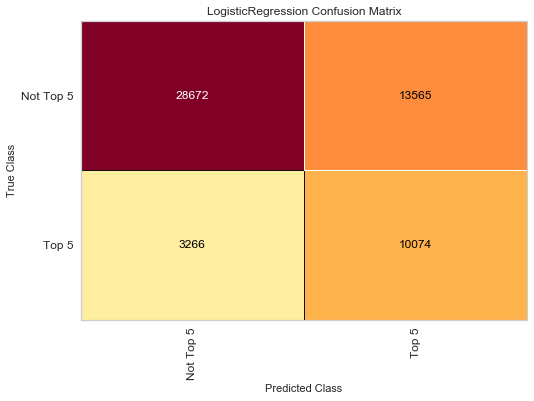

In [123]:
cm = ConfusionMatrix(model, classes=['Not Top 5','Top 5'])

cm.fit(X_train_new_r, y_train_new_r)
cm.score(X_test_new_r, y_test_new_r)

cm.show()

In [ ]:
res_w1["Res"]=results2
res_w1["Type"]="log new sc.0-1"

res_w2["Res"]=results_sc3
res_w2["Type"]="log new st.sc"

res_w3["Res"]=results_sc4
res_w3["Type"]="log new robust.sc"

resall=pd.concat([resall,res_w1,res_w2,res_w3], ignore_index=True)

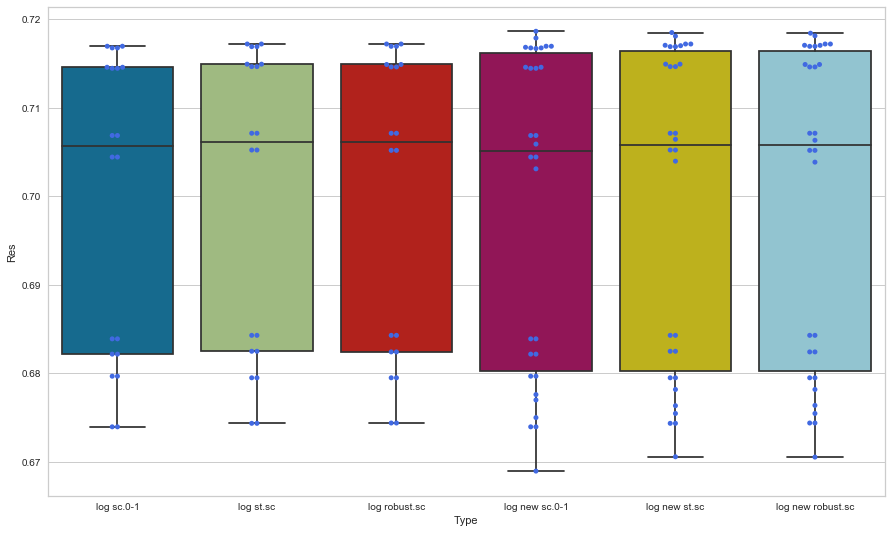

In [99]:
# Now let's compare them all 
plt.figure(figsize=(15,9))

sns.boxplot(data=resall, x="Type", y="Res")

sns.swarmplot(data=resall, x="Type", y="Res", color="royalblue")

In [108]:
modif_df.columns

Index(['matchId', 'teamId', 'distance1_2_x', 'distance1_3_x', 'distance1_4_x',
       'distance2_3_x', 'distance2_4_x', 'distance3_4_x',
       'distance_centroid1_x', 'distance_centroid2_x', 'distance_centroid3_x',
       'distance_centroid4_x', 'cluster_A_x', 'cluster_B_x', 'cluster_C_x',
       'cluster_D_x', 'n_players_y', 'distance1_2_y', 'distance1_3_y',
       'distance1_4_y', 'distance2_3_y', 'distance2_4_y', 'distance3_4_y',
       'distance_centroid1_y', 'distance_centroid2_y', 'distance_centroid3_y',
       'distance_centroid4_y', 'cluster_A_y', 'cluster_B_y', 'cluster_C_y',
       'cluster_D_y', 'agility_y', 'ranking_y', 'landing_risk1',
       'landing_risk2', 'landing_risk3', 'landing_risk4', 'risk1', 'risk2',
       'risk3', 'risk4', 'risk_std1', 'risk_std2', 'risk_std3', 'risk_std4',
       'risk_std_mean', 'risk_category', 'in Top 5'],
      dtype='object')

In [106]:
modif_df=teams_f.copy()


In [129]:
X_mod=modif_df.drop(["ranking_y",'in Top 5','matchId','distance_centroid1_x','distance_centroid2_x','distance_centroid3_x','distance_centroid4_x','distance_centroid1_y','distance_centroid2_y','distance_centroid3_y','distance_centroid4_y','cluster_A_x'],axis=1)

In [112]:
y_mod=modif_df['in Top 5']

In [130]:
X_mod_sc=scaler2.fit_transform(X_mod)

In [131]:
test_size=0.2
seed=7

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_mod_sc, y_mod, test_size=test_size, random_state=seed)

kfold=KFold(n_splits=10, random_state=7)

model=LogisticRegression(solver="liblinear",class_weight="balanced")

results_mod=cross_val_score(model, X_train_m, y_train_m, cv=kfold)

print(f'Logistic Regression St.Scaling - Accuracy {results_mod.mean()*100:.3f}% std {results_mod.std()*100:3f}')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Logistic Regression St.Scaling - Accuracy 67.381% std 0.284167


In [132]:
# TRAIN METRICS
model.fit(X_train_m, y_train_m)
y_pred_m = model.predict(X_train_m)
print(classification_report(y_train_m, y_pred_m))

              precision    recall  f1-score   support

           0       0.89      0.65      0.75    168497
           1       0.41      0.74      0.52     53811

    accuracy                           0.67    222308
   macro avg       0.65      0.70      0.64    222308
weighted avg       0.77      0.67      0.70    222308



In [133]:
# TEST METRICS
model.fit(X_test_m, y_test_m)
y_pred_m = model.predict(X_test_m)
print(classification_report(y_test_m, y_pred_m))

              precision    recall  f1-score   support

           0       0.89      0.65      0.75     42237
           1       0.40      0.74      0.52     13340

    accuracy                           0.67     55577
   macro avg       0.64      0.69      0.63     55577
weighted avg       0.77      0.67      0.69     55577



/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


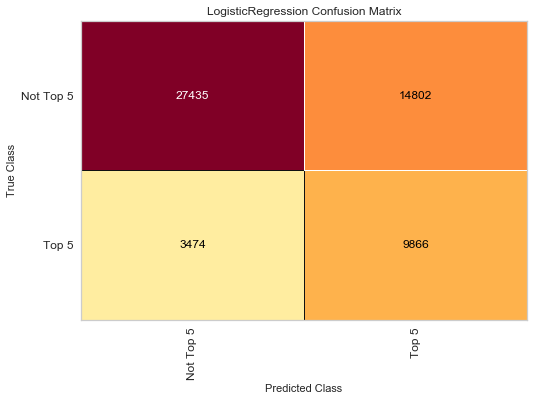

In [134]:
cm = ConfusionMatrix(model, classes=['Not Top 5','Top 5'])

cm.fit(X_train_m, y_train_m)
cm.score(X_test_m, y_test_m)

cm.show()